In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2023-03-27 12:38:10.689660: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-27 12:38:11.665646: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Num GPUs Available:  1


2023-03-27 12:38:12.892117: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0b:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-27 12:38:12.940154: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0b:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-27 12:38:12.940515: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0b:00.0/numa_node
Your kernel may have been built without NUMA support.


In [20]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory

with tf.device('/device:GPU:0'):
    print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

data_dir = 'simple_images'

# Apply transformations to augment the dataset and convert it to a tensor
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.Resizing(256, 256),
        layers.experimental.preprocessing.RandomCrop(224, 224),
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.Rescaling(1./255),
        layers.experimental.preprocessing.RandomContrast(0.1),
    ]
)

# Load the dataset
dataset = image_dataset_from_directory(
    data_dir,
    batch_size=16,
    image_size=(224, 224),
    validation_split=0.2,
    subset='training',
    seed=123,
    label_mode='categorical'
)

# Split the dataset into training and validation sets
val_dataset = image_dataset_from_directory(
    data_dir,
    batch_size=16,
    image_size=(224, 224),
    validation_split=0.2,
    subset='validation',
    seed=123,
    label_mode='categorical'
)

# Create DataLoaders for training and validation
train_loader = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
val_loader = val_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

# Get the number of classes
num_classes = len(dataset.class_names)

# Define the model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_loader,
                    validation_data=val_loader,
                    epochs=10)


Num GPUs Available:  1
Found 800 files belonging to 8 classes.
Using 640 files for training.
Found 800 files belonging to 8 classes.
Using 160 files for validation.
Epoch 1/10


2023-03-27 12:25:08.771755: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [640]
	 [[{{node Placeholder/_4}}]]
2023-03-27 12:25:08.771987: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [640]
	 [[{{node Placeholder/_0}}]]


39/40 [============================>.] - ETA: 0s - loss: 1522.2965 - accuracy: 0.2404

2023-03-27 12:25:11.693262: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [160]
	 [[{{node Placeholder/_0}}]]
2023-03-27 12:25:11.693477: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [160]
	 [[{{node Placeholder/_4}}]]


40/40 [==============================] - 3s 51ms/step - loss: 1484.2874 - accuracy: 0.2453 - val_loss: 2.2868 - val_accuracy: 0.3063
Epoch 2/10
40/40 [==============================] - 2s 47ms/step - loss: 1.3263 - accuracy: 0.5578 - val_loss: 2.0741 - val_accuracy: 0.3938
Epoch 3/10
40/40 [==============================] - 2s 48ms/step - loss: 0.8569 - accuracy: 0.7281 - val_loss: 2.8271 - val_accuracy: 0.4187
Epoch 4/10
40/40 [==============================] - 2s 45ms/step - loss: 0.4854 - accuracy: 0.8547 - val_loss: 2.9051 - val_accuracy: 0.4125
Epoch 5/10
40/40 [==============================] - 2s 44ms/step - loss: 0.3757 - accuracy: 0.8969 - val_loss: 2.7801 - val_accuracy: 0.4062
Epoch 6/10
40/40 [==============================] - 2s 44ms/step - loss: 0.5076 - accuracy: 0.8906 - val_loss: 3.3459 - val_accuracy: 0.3438
Epoch 7/10
40/40 [==============================] - 2s 44ms/step - loss: 0.4628 - accuracy: 0.8906 - val_loss: 3.1088 - val_accuracy: 0.4437
Epoch 8/10
40/40 [===

In [2]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import VGG16


with tf.device('/device:GPU:0'):
    print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

data_dir = 'simple_images'

# Apply transformations to augment the dataset and convert it to a tensor
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.Resizing(256, 256),
        layers.experimental.preprocessing.RandomCrop(224, 224),
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.Rescaling(1./255),
        layers.experimental.preprocessing.RandomContrast(0.1),
    ]
)

# Load the dataset
dataset = image_dataset_from_directory(
    data_dir,
    batch_size=16,
    image_size=(224, 224),
    validation_split=0.2,
    subset='training',
    seed=123,
    label_mode='categorical'
)

# Split the dataset into training and validation sets
val_dataset = image_dataset_from_directory(
    data_dir,
    batch_size=16,
    image_size=(224, 224),
    validation_split=0.2,
    subset='validation',
    seed=123,
    label_mode='categorical'
)

# Create DataLoaders for training and validation
train_loader = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
val_loader = val_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

# Get the number of classes
num_classes = len(dataset.class_names)




pretrained_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in pretrained_model.layers:
    layer.trainable = False


model = models.Sequential([
    pretrained_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.6),
    layers.Dense(num_classes, activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_loader, validation_data=val_loader, epochs=20)



2023-03-27 12:38:19.787119: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0b:00.0/numa_node
Your kernel may have been built without NUMA support.


Num GPUs Available:  1
Found 800 files belonging to 8 classes.
Using 640 files for training.
Found 800 files belonging to 8 classes.


2023-03-27 12:38:19.787489: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0b:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-27 12:38:19.787883: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0b:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-27 12:38:20.978935: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0b:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-27 12:38:20.979259: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0b:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-27 12:38:20.979269: I tensorflow/core/co

Using 160 files for validation.
Epoch 1/20


2023-03-27 12:38:23.334567: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [640]
	 [[{{node Placeholder/_4}}]]
2023-03-27 12:38:23.334776: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [640]
	 [[{{node Placeholder/_4}}]]
2023-03-27 12:38:25.089439: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8800
2023-03-27 12:38:26.922762: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-03-27 12:3

38/40 [===========================>..] - ETA: 0s - loss: 33.1521 - accuracy: 0.3553

2023-03-27 12:38:28.936646: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [160]
	 [[{{node Placeholder/_0}}]]
2023-03-27 12:38:28.936852: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [160]
	 [[{{node Placeholder/_0}}]]


40/40 [==============================] - 6s 50ms/step - loss: 32.0768 - accuracy: 0.3609 - val_loss: 3.9777 - val_accuracy: 0.6687
Epoch 2/20
40/40 [==============================] - 2s 49ms/step - loss: 4.1434 - accuracy: 0.6313 - val_loss: 2.1014 - val_accuracy: 0.6187
Epoch 3/20
40/40 [==============================] - 2s 50ms/step - loss: 2.7107 - accuracy: 0.6625 - val_loss: 2.3507 - val_accuracy: 0.5813
Epoch 4/20
40/40 [==============================] - 2s 49ms/step - loss: 2.2807 - accuracy: 0.6594 - val_loss: 1.7209 - val_accuracy: 0.5750
Epoch 5/20
40/40 [==============================] - 2s 49ms/step - loss: 2.1043 - accuracy: 0.6234 - val_loss: 1.3761 - val_accuracy: 0.5813
Epoch 6/20
40/40 [==============================] - 2s 49ms/step - loss: 1.8390 - accuracy: 0.6797 - val_loss: 1.4281 - val_accuracy: 0.6313
Epoch 7/20
40/40 [==============================] - 2s 49ms/step - loss: 1.4939 - accuracy: 0.6750 - val_loss: 1.2574 - val_accuracy: 0.6875
Epoch 8/20
40/40 [=====

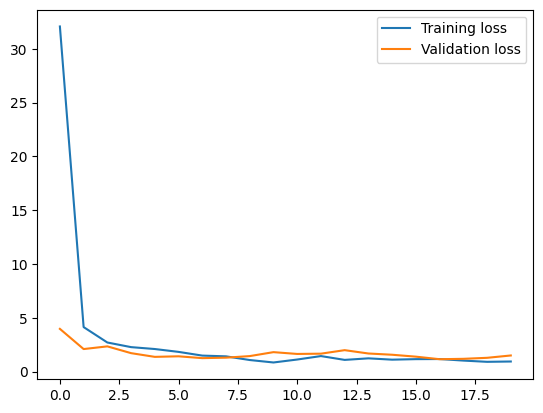

In [3]:
# Graph the training and validation loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

In [4]:
import sys
from PIL import Image
sys.modules['Image'] = Image 

In [11]:
from tensorflow import keras
import numpy as np
img = tf.keras.preprocessing.image.load_img(
    'simple_images/camembert/camembert_1.jpeg', target_size=(224, 224)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print("predictions: ", predictions)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(dataset.class_names[np.argmax(score)], 100 * np.max(score))
)


1/1 [==============================] - 0s 17ms/step
This image most likely belongs to camembert with a 27.97 percent confidence.
